<a href="https://colab.research.google.com/github/ABajad/New_Jupyter_Notebooks/blob/master/Reuters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [18]:
len(train_data)

8982

In [19]:
len(test_data)

2246

In [20]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in
train_data[0]])

In [21]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [22]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results


In [23]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [24]:
def to_one_hot(labels, dimensions=46):
  results = np.zeros((len(labels), dimensions))
  for i , label in enumerate(labels):
    results[i, label] = 1
  return results


In [25]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [31]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [32]:
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])

In [33]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [34]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 1s 51ms/step - loss: 2.5906 - accuracy: 0.5341 - val_loss: 1.7034 - val_accuracy: 0.6460
Epoch 2/20
16/16 [==============================] - 1s 38ms/step - loss: 1.4009 - accuracy: 0.7108 - val_loss: 1.2865 - val_accuracy: 0.7240
Epoch 3/20
16/16 [==============================] - 1s 38ms/step - loss: 1.0551 - accuracy: 0.7740 - val_loss: 1.1359 - val_accuracy: 0.7530
Epoch 4/20
16/16 [==============================] - 1s 38ms/step - loss: 0.8547 - accuracy: 0.8145 - val_loss: 1.0471 - val_accuracy: 0.7660
Epoch 5/20
16/16 [==============================] - 1s 37ms/step - loss: 0.6882 - accuracy: 0.8509 - val_loss: 0.9761 - val_accuracy: 0.7950
Epoch 6/20
16/16 [==============================] - 1s 39ms/step - loss: 0.5578 - accuracy: 0.8824 - val_loss: 0.9502 - val_accuracy: 0.7980
Epoch 7/20
16/16 [==============================] - 1s 37ms/step - loss: 0.4540 - accuracy: 0.9057 - val_loss: 0.9319 - val_accuracy: 0.8010
Epoch 8/20
16

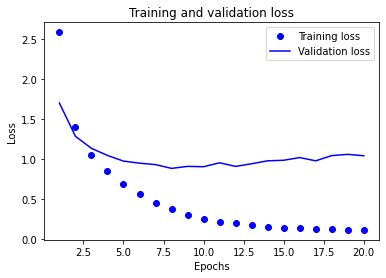

In [36]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [39]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

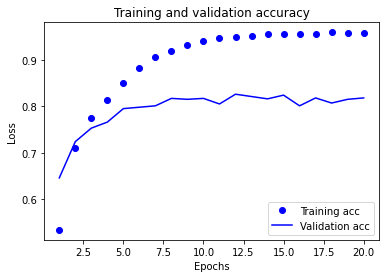

In [41]:
plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [43]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 1s 49ms/step - loss: 2.6486 - accuracy: 0.5262 - val_loss: 1.7297 - val_accuracy: 0.6630
Epoch 2/9
16/16 [==============================] - 1s 39ms/step - loss: 1.4082 - accuracy: 0.7126 - val_loss: 1.2946 - val_accuracy: 0.7180
Epoch 3/9
16/16 [==============================] - 1s 38ms/step - loss: 1.0434 - accuracy: 0.7779 - val_loss: 1.1195 - val_accuracy: 0.7520
Epoch 4/9
16/16 [==============================] - 1s 38ms/step - loss: 0.8242 - accuracy: 0.8250 - val_loss: 1.0247 - val_accuracy: 0.7730
Epoch 5/9
16/16 [==============================] - 1s 37ms/step - loss: 0.6538 - accuracy: 0.8631 - val_loss: 0.9688 - val_accuracy: 0.7960
Epoch 6/9
16/16 [==============================] - 1s 38ms/step - loss: 0.5256 - accuracy: 0.8885 - val_loss: 0.9030 - val_accuracy: 0.8150
Epoch 7/9
16/16 [==============================] - 1s 38ms/step - loss: 0.4259 - accuracy: 0.9094 - val_loss: 0.9019 - val_accuracy: 0.8100
Epoch 8/9
16/16 [===

In [44]:
results


[0.993196427822113, 0.7818343639373779]

In [45]:
#@title random approach


In [56]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18788958147818344

In [57]:
predictions = model.predict(x_test)

In [58]:
predictions[0].shape

(46,)

In [60]:
np.sum(predictions[0])

1.0000001

In [61]:
np.argmax(predictions[0])

3